# Machine Learning
### k-Nearest Neighbors

On commence par importer quelques modules python importants :

- Numpy : pour des claculs (algèbre linéaire, etc)
- Pandas : pour la lecture des fichiers csv, etc 

In [4]:
import numpy as np
import pandas as pa

import warnings
warnings.filterwarnings("ignore")

- Deux modules supplémentaires pour essentiellement visualiser les données ...

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

La commencent les modules utiles pour le machine learning. En premier sklearn, une des bibliothèques les plus riches pour faire du ML. 

En particulier, on importe : 

- la fonction permettant de générer la matrice de confusion (voir le cours)
- une fonction pour découper les données en deux parties : une pour l'entraînement et une pour le test.

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Nous allons illustrer notre premier algorithme d'apprentissage en travaillant avec le dataset breast cancer. Pour l'instant, nous allons utiliser quelques datasets de la bibliothèque sklearn. Nous verrons plus tard comment charger, grâce à pandas, des fichiers csv. 

A noter que plusieurs datasets font partie de ce sous-module de sklearn.

In [7]:
from sklearn.datasets import load_breast_cancer

Les datasets de sklearn sont, en général, bien formatés. Ils viennent avec une structure permettant de les visualiser et de les "fouiller" facilement. 

In [8]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Nous n'allons pas travailler avec le dataset dans sa globalité. Nous allons illustrer la méthode en travaillant juste sur deux attributs et sur la classe. N'oublions pas que nous cherchons à trouver un modèle, qui est en fait une fonction F telle que y = F(X).

A noter que la fonction Categorical transforme juste les deux classes en 0 et 1.

In [10]:
X = pa.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pa.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pa.get_dummies(y, drop_first=True)

On découpe les données en deux parties : une pour l'entraînement et une pour le test.
A noter que par défaut le dataset du test représente 25% de l'ensemble mais on peut changer ce découpage par défaut grâce au paramètre test_size.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

La commence l'utilisation du knn :

In [12]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Une fois le modèle entraîné, on l'utilise pour prédir les classes de X_test :

In [13]:
y_pred = knn.predict(X_test)

<AxesSubplot:xlabel='mean area', ylabel='mean compactness'>

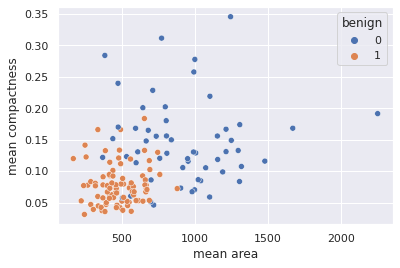

In [14]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

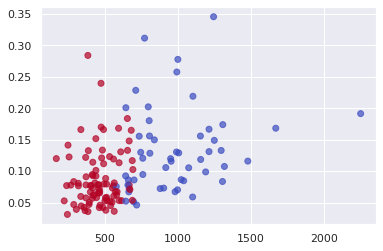

In [15]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

On mesure la performance de notre modèle. Pour cela, on calcule la matrice de confusion (voir le cours).

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42 13]
 [ 9 79]]


Et on calcule les métriques qui nous intéressent. Nous allons calculer l'accuracy de notre modèle :

In [17]:
acc = np.sum(np.diag(cm))/np.sum(cm)
print('{:.2%}'.format(acc))

84.62%


In [18]:
print(k, '{:.2%}'.format(acc))

5 84.62%
